In [123]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [124]:
# Function to parse a string into a NumPy array
def parse_vector_string(vector_string, vector_length):
    if isinstance(vector_string, float):
        return np.array([vector_string], dtype=np.float32)
    
    values = vector_string.strip('[]').split()
    if len(values) == vector_length:
        vector = np.array([float(value) for value in values], dtype=np.float32)
        return vector
    else:
        return np.zeros(vector_length, dtype=np.float32)

In [125]:
# Load your CSV file
data = pd.read_csv('Final_Vectorised_Dataset.csv')

# Define the expected length of your vectors
YOUR_VECTOR_LENGTH = 3041  # Modify this to the actual length of your vectors

In [126]:
# Assuming the CSV file has a column 'Title_Vector' containing vector strings
requirement_vectors = data['Title_Vector'].apply(parse_vector_string, vector_length=YOUR_VECTOR_LENGTH)

# Filter out entries with invalid vectors
requirement_vectors = requirement_vectors[requirement_vectors.apply(lambda x: x.shape == (YOUR_VECTOR_LENGTH,))]

# Extract relevant columns
#complexity = data[['Lines of Code', 'Cyclomatic Complexity']].values
consequence = data[['Number of Calls', 'TBF', 'Reliability']].values

In [127]:
# Convert the filtered arrays to a NumPy array and normalize
requirement_vectors = np.array(requirement_vectors.tolist(), dtype=np.float32)
scaler = MinMaxScaler()
requirement_vectors = scaler.fit_transform(requirement_vectors)
#complexity = scaler.fit_transform(complexity)
consequence = scaler.fit_transform(consequence)

In [128]:
# Split the data into training and testing sets
req_train, req_test, conseq_train, conseq_test = train_test_split(
    requirement_vectors, consequence, test_size=0.2)

In [129]:
# Build a neural network for consequence prediction
input_layer = Input(shape=(YOUR_VECTOR_LENGTH,))
consequence_output = Dense(3, activation='linear')(input_layer)  # 3 outputs for Consequence
consequence_model = Model(input_layer, consequence_output)
consequence_model.compile(optimizer='adam', loss='mean_squared_error')

In [130]:
# Train the consequence prediction model
consequence_model.fit(req_train, conseq_train, epochs=100, batch_size=32, validation_data=(req_test, conseq_test))

Epoch 1/25
10/10 [==============================] - 1s 22ms/step - loss: 0.2453 - val_loss: 0.2345
Epoch 2/25
10/10 [==============================] - 0s 13ms/step - loss: 0.2397 - val_loss: 0.2290
Epoch 3/25
10/10 [==============================] - 0s 11ms/step - loss: 0.2342 - val_loss: 0.2237
Epoch 4/25
10/10 [==============================] - 0s 13ms/step - loss: 0.2289 - val_loss: 0.2187
Epoch 5/25
10/10 [==============================] - 0s 13ms/step - loss: 0.2238 - val_loss: 0.2138
Epoch 6/25
10/10 [==============================] - 0s 11ms/step - loss: 0.2188 - val_loss: 0.2090
Epoch 7/25
10/10 [==============================] - 0s 11ms/step - loss: 0.2140 - val_loss: 0.2044
Epoch 8/25
10/10 [==============================] - 0s 11ms/step - loss: 0.2093 - val_loss: 0.1999
Epoch 9/25
10/10 [==============================] - 0s 10ms/step - loss: 0.2047 - val_loss: 0.1955
Epoch 10/25
10/10 [==============================] - 0s 10ms/step - loss: 0.2002 - val_loss: 0.1912
Epoch 11/

In [131]:
# Predict consequence values on the validation set
predicted_consequence = consequence_model.predict(req_test)

86/86 [==============================] - 0s 921us/step


In [132]:
# Calculate MSE and MAE for consequence prediction
mse_consequence = mean_squared_error(conseq_test, predicted_consequence)
mae_consequence = mean_absolute_error(conseq_test, predicted_consequence)

# Calculate the percentage of MSE and MAE relative to the range of consequence values
range_consequence = np.max(conseq_test) - np.min(conseq_test)
percentage_mse_consequence = (mse_consequence / range_consequence) * 100
percentage_mae_consequence = (mae_consequence / range_consequence) * 100

print(f'Consequence Prediction MSE: {mse_consequence:.2f}')
print(f'Consequence Prediction MAE: {mae_consequence:.2f}')
print(f'Consequence Prediction MSE as Percentage: {percentage_mse_consequence:.2f}%')
print(f'Consequence Prediction MAE as Percentage: {percentage_mae_consequence:.2f}%')

Consequence Prediction MSE: 0.14
Consequence Prediction MAE: 0.23
Consequence Prediction MSE as Percentage: 13.78%
Consequence Prediction MAE as Percentage: 23.09%


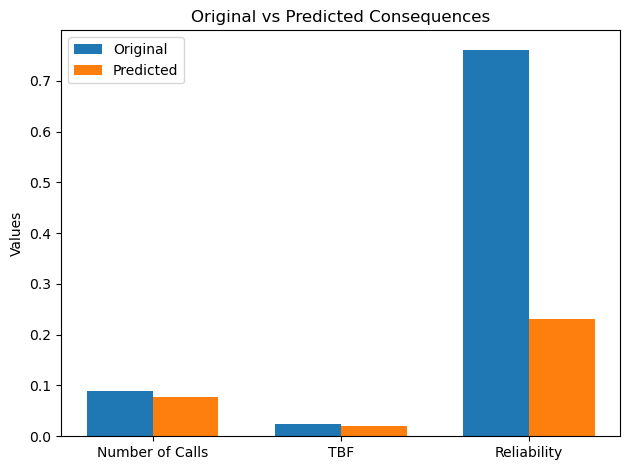

In [133]:
import matplotlib.pyplot as plt

# Extract 'Number of Calls', 'TBF', and 'Reliability' from the test set
num_calls_original = conseq_test[:, 0]
tbf_original = conseq_test[:, 1]
reliability_original = conseq_test[:, 2]

# Extract the predicted values
num_calls_predicted = predicted_consequence[:, 0]
tbf_predicted = predicted_consequence[:, 1]
reliability_predicted = predicted_consequence[:, 2]

# Create a bar graph
labels = ['Number of Calls', 'TBF', 'Reliability']
original_values = [num_calls_original.mean(), tbf_original.mean(), reliability_original.mean()]
predicted_values = [num_calls_predicted.mean(), tbf_predicted.mean(), reliability_predicted.mean()]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, original_values, width, label='Original')
rects2 = ax.bar(x + width/2, predicted_values, width, label='Predicted')

ax.set_ylabel('Values')
ax.set_title('Original vs Predicted Consequences')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

In [134]:
# Calculate MSE for Number of Calls
mse_number_of_calls = mean_squared_error(conseq_test[:, 2], predicted_consequence[:, 2])

# Calculate MAE for Number of Calls
mae_number_of_calls = mean_absolute_error(conseq_test[:, 2], predicted_consequence[:, 2])

# Calculate the percentage of MSE and MAE relative to the range for Number of Calls
range_number_of_calls = np.max(conseq_test[:, 2]) - np.min(conseq_test[:, 2])
percentage_mse_number_of_calls = (mse_number_of_calls / range_number_of_calls) * 100
percentage_mae_number_of_calls = (mae_number_of_calls / range_number_of_calls) * 100

print(f'Number of Calls Prediction MSE as Percentage: {percentage_mse_number_of_calls:.2f}%')
print(f'Number of Calls Prediction MAE as Percentage: {percentage_mae_number_of_calls:.2f}%')

# Calculate MSE for TBF
mse_tbf = mean_squared_error(conseq_test[:, 0], predicted_consequence[:, 0])

# Calculate MAE for TBF
mae_tbf = mean_absolute_error(conseq_test[:, 0], predicted_consequence[:, 0])

# Calculate the percentage of MSE and MAE relative to the range for TBF
range_tbf = np.max(conseq_test[:, 0]) - np.min(conseq_test[:, 0])
percentage_mse_tbf = (mse_tbf / range_tbf) * 100
percentage_mae_tbf = (mae_tbf / range_tbf) * 100

print(f'TBF Prediction MSE as Percentage: {percentage_mse_tbf:.2f}%')
print(f'TBF Prediction MAE as Percentage: {percentage_mae_tbf:.2f}%')

# Calculate MSE for Reliability
mse_reliability = mean_squared_error(conseq_test[:, 1], predicted_consequence[:, 1])

# Calculate MAE for Reliability
mae_reliability = mean_absolute_error(conseq_test[:, 1], predicted_consequence[:, 1])

# Calculate the percentage of MSE and MAE relative to the range for Reliability
range_reliability = np.max(conseq_test[:, 1]) - np.min(conseq_test[:, 1])
percentage_mse_reliability = (mse_reliability / range_reliability) * 100
percentage_mae_reliability = (mae_reliability / range_reliability) * 100

print(f'Reliability Prediction MSE as Percentage: {percentage_mse_reliability:.2f}%')
print(f'Reliability Prediction MAE as Percentage: {percentage_mae_reliability:.2f}%')


Number of Calls Prediction MSE as Percentage: 39.46%
Number of Calls Prediction MAE as Percentage: 57.83%
TBF Prediction MSE as Percentage: 1.30%
TBF Prediction MAE as Percentage: 8.19%
Reliability Prediction MSE as Percentage: 0.58%
Reliability Prediction MAE as Percentage: 3.23%


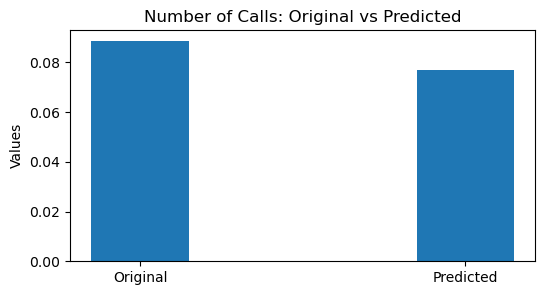

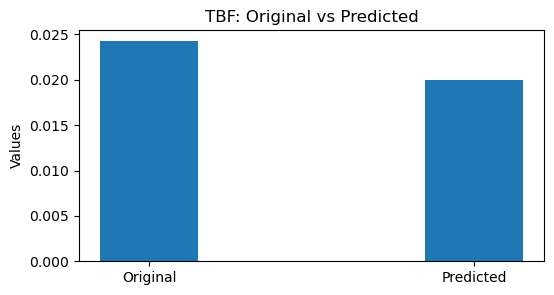

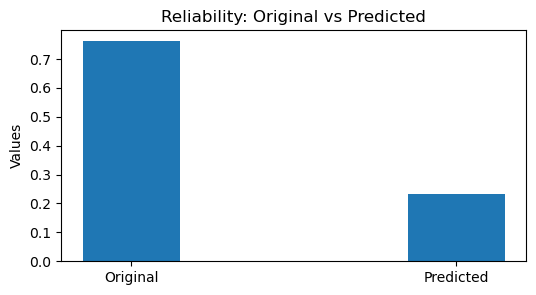

In [140]:
import matplotlib.pyplot as plt

# Define the smaller figure size
small_figsize = (6, 3)  # You can adjust the dimensions as needed

# Define the smaller width for the bars
small_width = 0.3  # You can adjust the width as needed

# Create separate bar graphs for each variable

# Bar graph for Number of Calls
plt.figure(figsize=small_figsize)
plt.bar(['Original', 'Predicted'], [num_calls_original.mean(), num_calls_predicted.mean()], width=small_width)
plt.title('Number of Calls: Original vs Predicted')
plt.ylabel('Values')
plt.show()

# Bar graph for TBF
plt.figure(figsize=small_figsize)
plt.bar(['Original', 'Predicted'], [tbf_original.mean(), tbf_predicted.mean()], width=small_width)
plt.title('TBF: Original vs Predicted')
plt.ylabel('Values')
plt.show()

# Bar graph for Reliability
plt.figure(figsize=small_figsize)
plt.bar(['Original', 'Predicted'], [reliability_original.mean(), reliability_predicted.mean()], width=small_width)
plt.title('Reliability: Original vs Predicted')
plt.ylabel('Values')
plt.show()
